In [4]:
from platform import python_version

print(python_version())

3.8.8


In [3]:
!pip install autocorrect

  Created wheel for autocorrect: filename=autocorrect-2.5.0-py3-none-any.whl size=621854 sha256=90fe97b3b39d139464dd367e1b9c824aeecbfc105f0455735e10621e73848d3f
  Stored in directory: c:\users\vinay\appdata\local\pip\cache\wheels\da\03\6e\62a48359ab630e39939dbb392cc079923bb77664e97a47645d
Successfully built autocorrect


In [4]:
!pip install -U setuptools

# Data preprocessing
1.remove non alphabetic characters
2.Lowering format
3.Tokenization
4.Remove stopwords
5.Steming
6.spell corerection

In [5]:
from autocorrect import Speller  
import re

In [6]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import pandas as pd

In [7]:
stemmer=PorterStemmer()
spell=Speller()
from tqdm import tqdm
import re

In [8]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
data=pd.read_csv("https://raw.githubusercontent.com/pydeveloperashish/Spam-Classifier-using-naive-bayes/main/spam.csv")

In [11]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [13]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
data.rename(columns={'v1': 'labels','v2':'messages'},inplace=True)

In [15]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


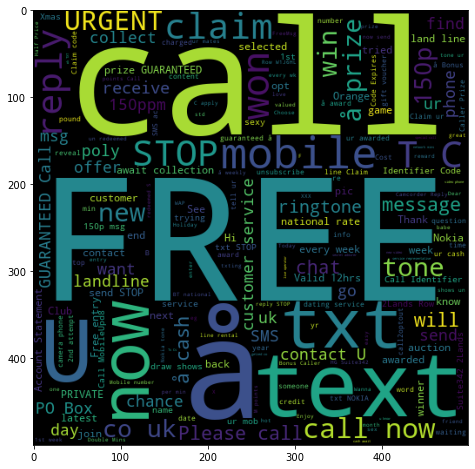

In [16]:
spam_word='  '.join(list(data[data['labels']=='spam']['messages']))
spam_wc=WordCloud(width=500,height=500).generate(spam_word)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

In [17]:
data.shape

(5572, 2)

In [18]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
#Remove 
new_data=[]

for i in tqdm(range(data.shape[0])):
    lines=data.iloc[i,1]
    #Remove non alphabetic characters
    lines=re.sub('[^A-Za-z]' , '  ',lines)
    #Lowering words
    lines=lines.lower()
    #Tokenization 
    tokenized_lines=word_tokenize(lines)
    processed_lines=[ ]
    
    #lemmatizer = WordNetLemmatizer()
     #lemmatizer.lemmatize(i)
    
    #Stopwordws and stemming
    for i in tokenized_lines:
        if i not in set(stopwords.words('english')): 
            processed_lines.append(stemmer.stem(i))
    final_lines='  '.join(processed_lines)
    new_data.append(final_lines)
            

100%|██████████████████████████████████████████████████████████████████████████████| 5572/5572 [01:18<00:00, 71.32it/s]


In [20]:
lines

'rofl    its  true  to  its  name'

In [21]:
tokenized_lines

['rofl', 'its', 'true', 'to', 'its', 'name']

In [22]:
processed_lines

['rofl', 'true', 'name']

In [23]:
final_lines

'rofl  true  name'

In [24]:
new_data

['go  jurong  point  crazi  avail  bugi  n  great  world  la  e  buffet  cine  got  amor  wat',
 'ok  lar  joke  wif  u  oni',
 'free  entri  wkli  comp  win  fa  cup  final  tkt  st  may  text  fa  receiv  entri  question  std  txt  rate  c  appli',
 'u  dun  say  earli  hor  u  c  alreadi  say',
 'nah  think  goe  usf  live  around  though',
 'freemsg  hey  darl  week  word  back  like  fun  still  tb  ok  xxx  std  chg  send  rcv',
 'even  brother  like  speak  treat  like  aid  patent',
 'per  request  mell  mell  oru  minnaminungint  nurungu  vettam  set  callertun  caller  press  copi  friend  callertun',
 'winner  valu  network  custom  select  receivea  prize  reward  claim  call  claim  code  kl  valid  hour',
 'mobil  month  u  r  entitl  updat  latest  colour  mobil  camera  free  call  mobil  updat  co  free',
 'gon  na  home  soon  want  talk  stuff  anymor  tonight  k  cri  enough  today',
 'six  chanc  win  cash  pound  txt  csh  send  cost  p  day  day  tsandc  appli  r

In [25]:
data.labels[0]

'ham'

In [26]:
data['labels' ]=data['labels' ].apply(lambda x: 1 if x== 'spam'  else 0)    
data
#data=pd.get_dummies(messages['labesl'])    [makes 2 ham &spam columns]
#y=data.iloc[:,1].values   [select only one column bcoze 0 =ham 1=spam]

,labels,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [27]:
Y=data['labels']
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: labels, Length: 5572, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(new_data, Y ,test_size=0.25)

In [30]:
X_train

['hmm  mani  unfortun  pic  obvious  arent  hot  cake  kinda  fun  tho',
 'watch  lotr  w  si  di  aft  u  wan  meet  dinner  nite',
 'yesterday  go  home',
 'mani  thing  antibiot  use  chest  abdomen  gyna  infect  even  bone  infect',
 'sound  good  keep  post',
 'took  mr  owl  lick',
 'haha  yeah  see  sec',
 'mysteri  solv  open  email  sent  anoth  batch  sweeti',
 'tabl  occupi  wait  tree',
 'long  fuckin  showr',
 'today  system  sh  get  readi  well  also  deep  well',
 'oh  yeah  clearli  fault',
 'lol  oop  sorri  fun',
 'go  orchard  lareadi  reach  soon  u  reach',
 'repli  boy  chang  phone  number',
 'de  see  onlin  shop  ask',
 'hi  babi  im  sat  bloodi  bu  mo  wont  home  wan  na  somethin  later  call  later  ortxt  back  jess  xx',
 'oki',
 'done',
 'check  error  difficulti  correct',
 'pleas  call  immedi  urgent  messag  wait',
 'g  w  r',
 'urgent  tri  contact  u  today  draw  show  prize  guarante  call  land  line  claim  valid  hr',
 'right  think',
 'fi

In [31]:
X_test

['u  doin  babi  girl  hope  u  okay  everi  time  call  ure  phone  miss  u  get  touch',
 'oki  thanx',
 'sore  throat  scratch  talk',
 'decemb  mobil  mth  entitl  updat  latest  colour  camera  mobil  free  call  mobil  updat  co  free',
 'mean  websit  ye',
 'moon  come  color  dream  star  make  music  sm  give  warm  peac  sleep  good  night',
 'yeah  sure  give  coupl  minut  track  wallet',
 'fine  send  greet',
 'alway  say  welp',
 'hi  wkend  ok  journey  terribl  wk  good  huge  back  log  mark',
 'ok  anyway  need  chang  said',
 'get  ten  billion  call  text  help  god',
 'ye  care  caus  know',
 'thank  fill  complet  calm  reassur',
 'ok',
 'age  abj',
 'also  da  feel  yesterday  night  wait  til  day  night  dear',
 'welcom  pleas  repli  age  gender  begin  e  g',
 'hiya  sorri  hav  signal  seen  heard  neither  unusu  put  case  get  sort  hug  snog',
 'si  lor  juz  watch  italian  job',
 'great  hope  use  connect  mode  men  also  co  never  know  old  friend

# Vectorization using BagOfWords

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
matrix=CountVectorizer()
#from sklearn.feature_extraction.text import TfidfVectorizer
#cv = TfidfVectorizer(max_features=2500)
#X = cv.fit_transform(corpus).toarray()

In [33]:
X_train_vect=matrix.fit_transform(X_train).toarray()
X_test_vect=matrix.transform(X_test).toarray()

In [34]:
X_train_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
X_test_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# train model

In [36]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
#from sklearn.naive_bayes import MultinomialNB
#model=MultinomialNB().fit(X_train,Y_train)

In [37]:
model.fit(X_train_vect,Y_train)

GaussianNB()

In [38]:
model.classes_

array([0, 1], dtype=int64)

In [39]:
Y_pred=model.predict(X_test_vect)

In [40]:
Y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [42]:
accuracy_score(Y_test,Y_pred)*100

87.86791098348887

In [47]:
cm=confusion_matrix(Y_test, Y_pred)
cm

array([[1065,  149],
       [  20,  159]], dtype=int64)

<AxesSubplot:>

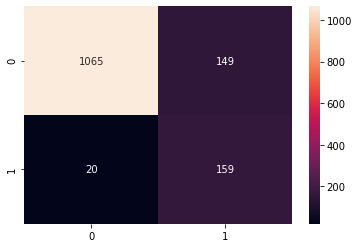

In [48]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')